#### Preamble

Connect with drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pwd
!ls
!python --version

/content
drive  sample_data
Python 3.8.16


In [3]:
!wget https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!wget https://www.kaggle.com/datasets/saurabh00007/diabetescsv/download?datasetVersionNumber=1
!tar -xvzf spark-3.0.0-bin-hadoop2.7.tgz
!pip install findspark

--2022-12-31 13:18:35--  https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220272364 (210M) [application/x-gzip]
Saving to: ‘spark-3.0.0-bin-hadoop2.7.tgz’

spark-3.0.0-bin-had 100%[===================>] 210.07M  27.6MB/s    in 8.2s    

2022-12-31 13:18:44 (25.5 MB/s) - ‘spark-3.0.0-bin-hadoop2.7.tgz’ saved [220272364/220272364]

--2022-12-31 13:18:44--  https://www.kaggle.com/datasets/saurabh00007/diabetescsv/download?datasetVersionNumber=1
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=dataset

In [4]:
import os
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"
import findspark
findspark.init()

# Predicting Diabetes with PySpark
## EDA

In [5]:
from pyspark.sql import SparkSession

In [6]:
spark = SparkSession.builder.appName("Diabetes Project").getOrCreate()

In [8]:
path = '/content/drive/MyDrive/Big Data/PySpark/data_science_for_everyone-main/data_science_for_everyone-main/pyspark_examples/data/diabetes.csv'
df = spark.read.csv(path, header=True, inferSchema=True)

In [9]:
df.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [ ]:
df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [10]:
df.count()

768

In [11]:
df.describe().toPandas()

,summary,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,count,768,768,768,768,768,768,768,768,768
1,mean,3.8450520833333335,120.89453125,69.10546875,20.536458333333332,79.79947916666667,31.992578124999977,0.4718763020833327,33.240885416666664,0.3489583333333333
2,stddev,3.36957806269887,31.97261819513622,19.355807170644777,15.952217567727642,115.24400235133803,7.884160320375441,0.331328595012775,11.760231540678689,0.476951377242799
3,min,0,0,0,0,0,0.0,0.078,21,0
4,max,17,199,122,99,846,67.1,2.42,81,1


In [12]:
df.groupby('Outcome').count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [15]:
df.sort('Age').groupby('Age').count().show()

+---+-----+
|Age|count|
+---+-----+
| 31|   24|
| 65|    3|
| 53|    5|
| 34|   14|
| 81|    1|
| 28|   35|
| 26|   33|
| 27|   32|
| 44|    8|
| 22|   72|
| 47|    6|
| 52|    8|
| 40|   13|
| 57|    5|
| 54|    6|
| 48|    5|
| 64|    1|
| 41|   22|
| 43|   13|
| 37|   19|
+---+-----+
only showing top 20 rows



In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

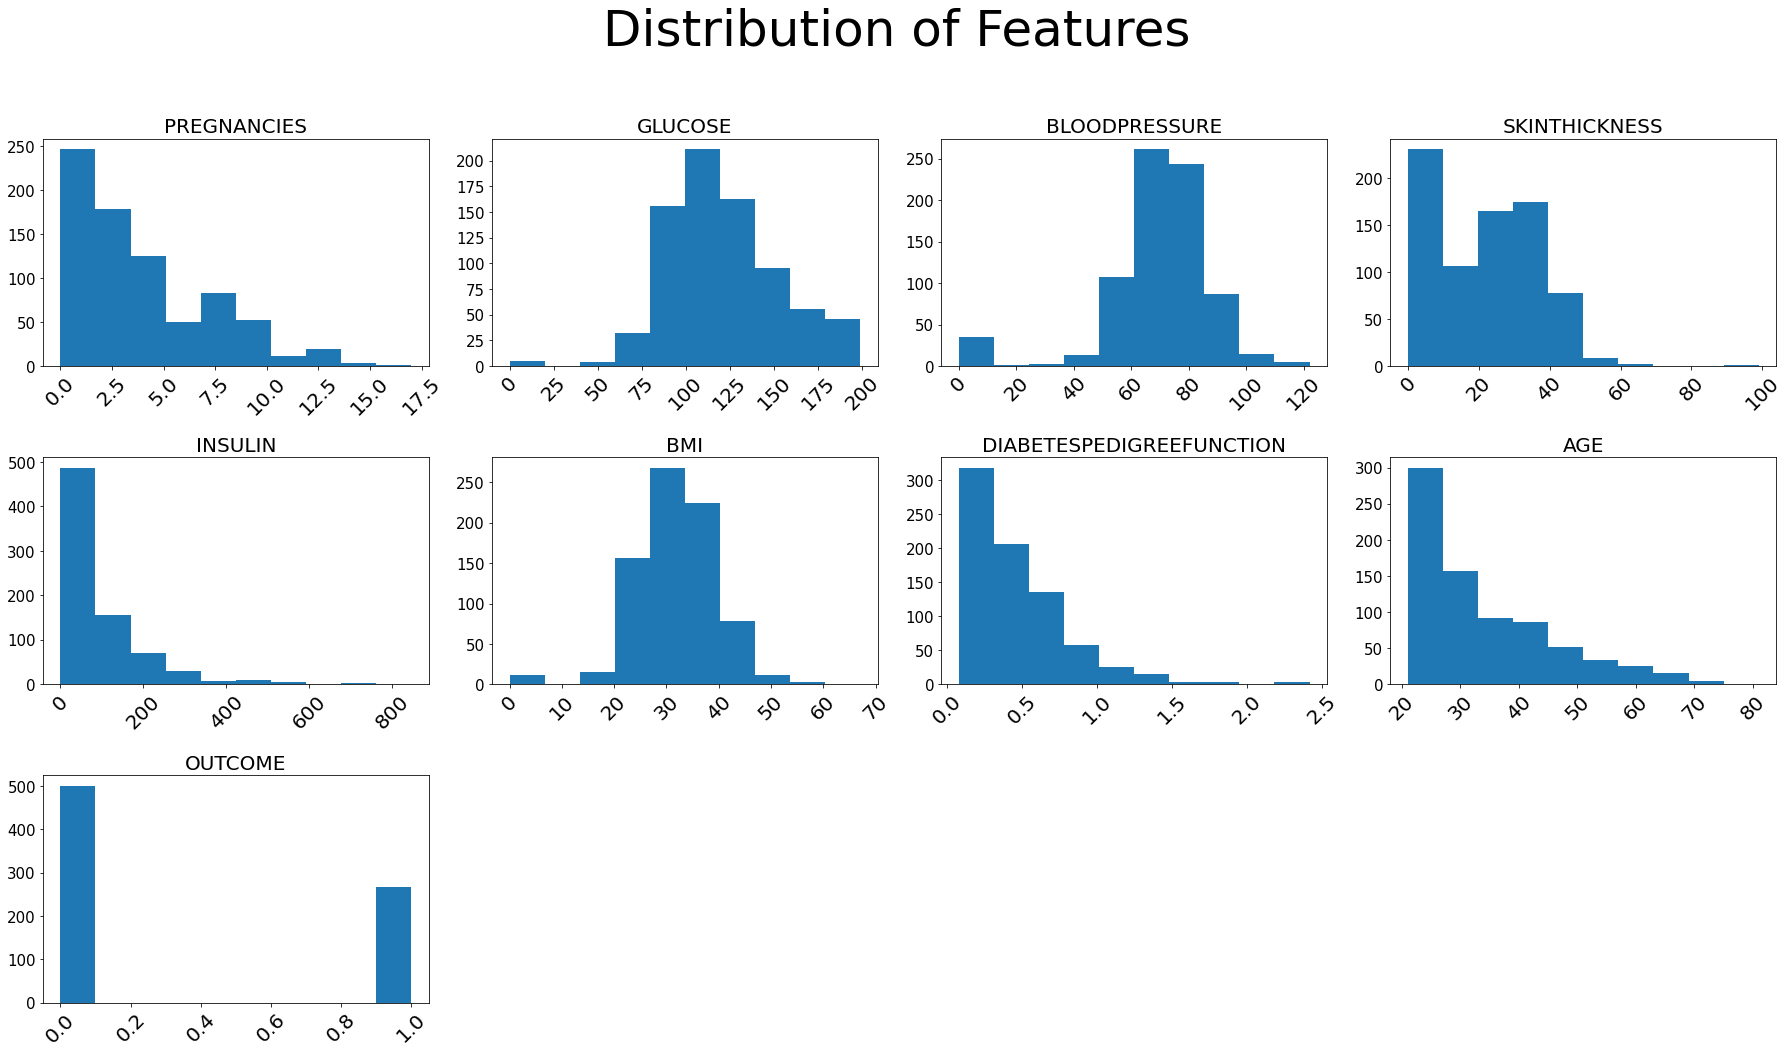

In [17]:
fig = plt.figure(figsize=(25, 15))
st = fig.suptitle("Distribution of Features", fontsize=50, verticalalignment="center")

for col, num in zip(df.toPandas().describe().columns, range(1,11)):
  ax = fig.add_subplot(3,4, num)
  ax.hist(df.toPandas()[col])
  plt.grid(False)
  plt.xticks(rotation=45, fontsize=20)
  plt.yticks(fontsize=15)
  plt.title(col.upper(), fontsize=20)

plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85, hspace=0.4)
plt.show()

In [19]:
for c in df.columns:
  print(c)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [18]:
from pyspark.sql.functions import isnan, when, count, col #IS NULL , WHEN, COUNT, Column

In [25]:
df.select([count(when(isnan(c),c)).alias(c) for c in df.columns]).toPandas().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,0,0,0,0,0,0,0,0


### User Defined Functions (UDF)

In [26]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

In [28]:
y_udf = udf(lambda y: "no" if y == 0 else "yes", StringType())

# If the patient has diabetes put yes
# If the patient has no diabetes put NO

In [35]:
df = df.withColumn("HasDiabetes",y_udf('Outcome'))

# Create new table called HasDiabetes nad replace 0, 1 with NO, Yes

In [36]:
df.show(10)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+-----------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|HasDiabetes|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+-----------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|        yes|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|         no|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|        yes|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|         no|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|        yes|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|     

In [38]:
def udf_multi(age):
  if (age < 25):
    return "Under 25"
  elif (age >=25 and age <= 35):
    return "Between 25 and 35"
  elif (age > 35 and age < 50):
    return "Between 36 and 50"
  elif (age >= 50):
    return "Over 50"
  else: return "NA"

In [39]:
age_udf = udf(udf_multi)
df = df.withColumn('age_udf', age_udf('Age'))

In [40]:
df.show(10)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+-----------+-----------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|HasDiabetes|          age_udf|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+-----------+-----------------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|        yes|          Over 50|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|         no|Between 25 and 35|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|        yes|Between 25 and 35|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|         no|         Under 25|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33

In [41]:
from pyspark.sql import functions as F 
from pyspark.sql.functions import rank, sum, desc 
from pyspark.sql import Window

In [42]:
window = Window.rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

In [43]:
age_group_tab = df.select(["age_udf","Glucose"]).\
                      groupBy('age_udf').\
                          agg(
                              F.count('Glucose').alias('UserCount'),
                              F.mean('Glucose').alias('Glucose_AVG'),
                              F.min('Glucose').alias('Glucose_MIN'),
                              F.max('Glucose').alias('Glucose_MAX')).\
                          withColumn('total', sum(col('UserCount')).over(window)).\
                          withColumn('Percent', col('UserCount')*100 / col('total')).\
                          drop(col('total')).sort(desc('Percent'))

In [44]:
age_group_tab.toPandas()

,age_udf,UserCount,Glucose_AVG,Glucose_MIN,Glucose_MAX,Percent
0,Between 25 and 35,279,119.677419,68,198,36.328125
1,Under 25,219,110.858447,0,199,28.515625
2,Between 36 and 50,181,125.740331,0,197,23.567708
3,Over 50,89,139.550562,57,197,11.588542


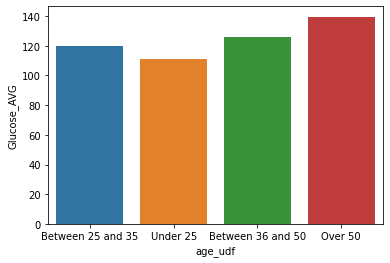

In [45]:
sns.barplot(x="age_udf", y="Glucose_AVG",data=age_group_tab.toPandas());

## Correlation

In [46]:
numeric_features = [t[0] for t in df.dtypes if t[1] !='string']
numeric_features_df = df.select(numeric_features)
numeric_features_df.toPandas().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
col_names = numeric_features_df.columns
features = numeric_features_df.rdd.map(lambda row: row[0:])

In [50]:
from pyspark.mllib.stat import Statistics
import pandas as pd

In [52]:
corr_mat = Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index = col_names
corr_df.columns = col_names
round(corr_df, 2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


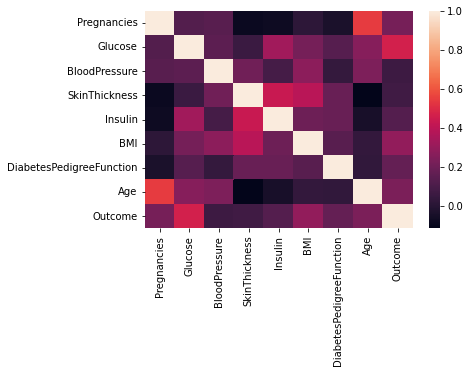

In [53]:
sns.heatmap(corr_df);